Import pandas for data manipulation

In [45]:
import pandas as pd

train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

# Useful for testing and also avoid getting the train data overfitted
# validation_df = train_df.sample(frac=0.2, random_state=1337)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Remove non categorial columns from data frame

In [46]:


categorial_cols = train_df.select_dtypes(include=["object"]).columns

train_df = train_df.drop(columns=categorial_cols)
test_df = test_df.drop(columns=categorial_cols)
# validation_df = validation_df.drop(columns=categorial_cols)

train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

Replace missing data values (such as NaN) for properly training consistency

In [47]:
train_df[train_df.isnull().any(axis=1)]

train_df = train_df.fillna(-1)
test_df = test_df.fillna(-1)

View sale price values correlated positions in cartesian plane to figure out which algoritm would be a good fit.

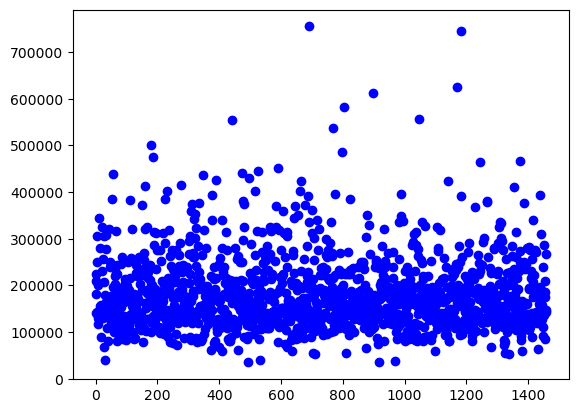

In [48]:
import matplotlib.pyplot as plt

plt.scatter(train_df.index, train_df['SalePrice'], color='blue', label='SalePrice')

In [49]:
from sklearn.linear_model import LinearRegression

X_train = train_df.drop(columns=["SalePrice"]) 
y_train = train_df["SalePrice"]

model = LinearRegression()

model.fit(X_train, y_train)

result = model.predict(test_df)

result

array([118744.94961612, 151512.01018069, 172121.10079976, ...,
       177541.53875199, 116647.19112299, 255820.41388789])

Export predict result to CSV file

In [50]:
result_df = pd.DataFrame({"Id": test_df["Id"], "SalePrice": result})

print(result_df)

result_df.to_csv("result.csv", index=False)

        Id      SalePrice
0     1461  118744.949616
1     1462  151512.010181
2     1463  172121.100800
3     1464  199450.655862
4     1465  194199.531010
...    ...            ...
1454  2915   72962.466091
1455  2916   58627.192109
1456  2917  177541.538752
1457  2918  116647.191123
1458  2919  255820.413888

[1459 rows x 2 columns]
